# *ADAM Chapter 4 - Making Statistical Inferences from Samples* #

### *Pr. 4.4 Using classical and Bootstrap approaches to verify claimed benefit of gasoline additive*

Authors: Diego Valdivieso, Tim Diller, and Gregor Henze

Created: May 23rd, 2024

An inventor claims to have developed a gasoline additive
which increases gas mileage of cars. He specifically states
that tests using a specific model and make of car resulting in
an increase of 30 miles per filling. An independent testing
group repeated the tests on six identical cars and obtained the
results shown in Table 4.15.


Table 4.15

| Regular      | 395 | 420 | 405 | 417 | 399 | 410 |
|--------------|-----|-----|-----|-----|-----|-----|
| With Additive| 440 | 436 | 447 | 453 | 444 | 426 |


(a) Check whether the data sets are approximately normally
distributed.

(b) Even if they are not, assume normal distribution, and
perform parametric tests at the 95% CL to verify the
inventor’s claim.

(c) (This approach does not involve any assumptions about
the shape of the distribution). Repeat the problem using
the bootstrap method with 500 samples.

(d) Compare results from (b) and (c).

# Introduction #

The problem involves verifying the claimed benefit of a gasoline additive that purportedly increases gas mileage by 30 miles per filling. To test this claim, we have data from an independent testing group that conducted tests on six identical cars. We will use both classical and [bootstrap statistical methods](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) to analyze the data. The steps involved include checking the normality of the data, performing parametric tests assuming normal distribution, and applying the bootstrap method. Finally, we will compare the results obtained from both methods.

##  Importing Libraries##

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, probplot, ttest_rel, ttest_1samp
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

## Units ##

In [2]:
m = 1 # miles

# Solution ##

##(a): Check Whether the Data Sets are Approximately Normally Distributed##

We will use [Q-Q plots](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) to visually inspect if the data is approximately normally distributed, and also visualize the data with Violin plots. Additionally, we will use statistical tests such as the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test).

### Shapiro-Wilk Test ###

In [3]:
# Data
regular = [395, 420, 405, 417, 399, 410]*m
with_additive = [440, 436, 447, 453, 444, 426]*m

# Creating DataFrame
df = pd.DataFrame({'Regular': regular, 'With_Additive': with_additive})

# Normality test
stat_r, p_value_r = shapiro(df['Regular'])
print(f"Shapiro-Wilk test for Regular: Statistics={np.round(stat_r,3)}, p-value={np.round(p_value_r,3)}")

alpha = 0.05
if p_value_r < alpha:
    print("The Regular gasoline data is not normally distributed.")
else:
    print("The Regular gasoline data is normally distributed.")

stat_wa, p_value_wa = shapiro(df['With_Additive'])
print(f"Shapiro-Wilk test for With_Additive: Statistics={np.round(stat_wa,3)}, p-value={np.round(p_value_wa,3)}")

if p_value_wa < alpha:
    print("The with additive gasoline data is not normally distributed.")
else:
    print("The with additive gasoline data is normally distributed.")

Shapiro-Wilk test for Regular: Statistics=0.955, p-value=0.777
The Regular gasoline data is normally distributed.
Shapiro-Wilk test for With_Additive: Statistics=0.983, p-value=0.967
The with additive gasoline data is normally distributed.


Comment: Based on the Shapiro-Wilk test, the p-values are greater than 0.05, we do not reject the null hypothesis, indicating the data is normally distributed.

### Violin plots of the data ###

In [7]:
# Create a single violin plot with two violins
fig = go.Figure()

# Add violin plot for Regular Mileage
fig.add_trace(go.Violin(y=df['Regular'],
                        name='Regular',
                        box_visible=True,
                        meanline_visible=True))

# Add violin plot for Mileage with Additive
fig.add_trace(go.Violin(y=df['With_Additive'],
                        name='With Additive',
                        box_visible=True,
                        meanline_visible=True))

# Update layout
fig.update_layout(
    title='Violin Plot of Mileage',
    width=800,  # Width of the figure in pixels
    height=600, # Height of the figure in pixels
    yaxis_title='Mileage'
)

fig.show()

### Q-Q plots ###

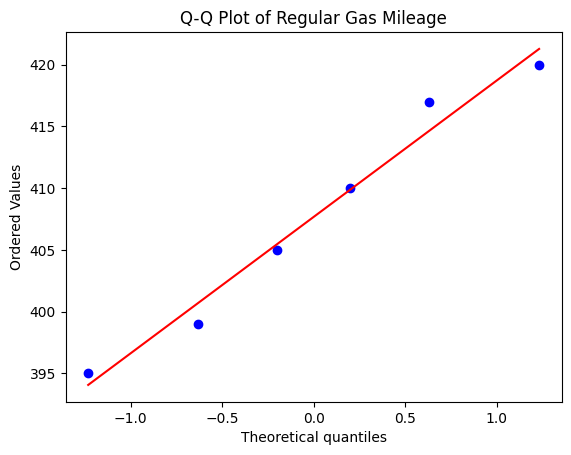

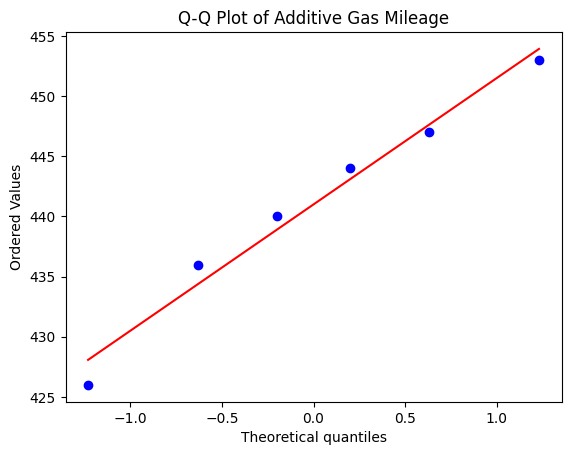

In [8]:
# Q-Q plots
probplot(regular, dist="norm", plot=plt)
plt.title('Q-Q Plot of Regular Gas Mileage')
plt.show()

probplot(with_additive, dist="norm", plot=plt)
plt.title('Q-Q Plot of Additive Gas Mileage')
plt.show()

Comment: When we evaluate both Q-Q plots, it is possible to conclude from visual inspection that both data sets follow a normal distribution, supporting the findings from the Shapiro-Wilk Test. The Violin plot also show that there is likely a difference between the dataset where the additive is used and the dataset where it isnt, though the next chapter will quantify this probability.

## (b) Even if they are not, assume normal distribution, and perform parametric tests at the 95% CL to verify the inventor’s claim. ##

To verify the inventor's claim, we will use a paired t-test to evaluate the differences between the gas mileage of cars using regular gasoline and those using the gasoline with the additive. The paired [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) is appropriate here as it compares the means of two related groups (the same cars tested with and without the additive) to determine if there is a statistically significant difference between them. This test will help us assess whether the additive significantly increases gas mileage by the claimed 30 miles per filling.

We first evaluate is the data sets are different or not

Null Hypothesis (H0):
The null hypothesis states that there is no difference in the mean gas mileage between the cars using regular gasoline and those using the gasoline additive. In other words, the mean difference between the two sets of observations is zero.

Alternative Hypothesis (H1):
The alternative hypothesis states that there is a difference in the mean gas mileage between the cars using regular gasoline and those using the gasoline additive. In other words, the mean difference between the two sets of observations is not zero.

In [ ]:
# Parametric test
# Perform paired t-test
ttest_result = ttest_rel(with_additive, regular)

# Results
t_stat, p_value = ttest_result
print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 5/100
# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in gas mileage with the additive.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in gas mileage with the additive.")

T-statistic: 5.906931124580457, P-value: 0.0019796944062025245
Reject the null hypothesis: There is a significant difference in gas mileage with the additive.


Comment: We observe that the data sets differ. Now, we are interested in determining if these differences are significant at the inventor's claimed level of a 30-mile increase per filling (i.e., at least 30). To achieve this, we will evaluate the difference between the observed mileage and the claimed increase of 30 miles per filling.

Null Hypothesis (H0): The mean difference in gas mileage is less than 30 miles per filling.

Alternative Hypothesis (H1): The mean difference in gas mileage is greater than or equal to 30 miles per filling.


To test if the gasoline additive achieves the claimed benefit of increasing gas mileage by at least 30 miles per filling, we can modify our hypotheses accordingly. This involves using a one-sample t-test on the differences between the gas mileage with and without the additive.

In [ ]:
# Calculate the differences
differences = np.array(with_additive) - np.array(regular)

# Perform one-sample t-test
claimed_difference = 30*m
t_stat, p_value = ttest_1samp(differences, claimed_difference)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Since we are performing a one-tailed test, we need to divide the p-value by 2
p_value_one_tailed = p_value / 2

# Check if the mean difference is greater than or equal to 30
if t_stat > 0 and p_value_one_tailed < alpha:
    print("Reject the null hypothesis: The mean difference in gas mileage is greater than or equal to 30 miles per filling.")
else:
    print("Fail to reject the null hypothesis: The mean difference in gas mileage is not significantly greater than or equal to 30 miles per filling.")

T-statistic: 0.5906931124580461, P-value: 0.5804138380204138
Fail to reject the null hypothesis: The mean difference in gas mileage is not significantly greater than or equal to 30 miles per filling.


Comment:Since the calculated p-value is 0.58, which is higher than our threshold of 0.05, we conclude that there is no statistically significant difference in gas mileage with the additive compared to the claimed increase of 30 miles per filling. This means that based on our sample data, we do not have sufficient evidence to support the inventor's claim that the additive increases gas mileage by 30 miles per filling. Therefore, the observed differences could likely be due to random variation rather than a true effect of the additive.



## (c) (This approach does not involve any assumptions about the shape of the distribution). Repeat the problem using the bootstrap method with 500 samples. and check the claim of 30% added mileage ##

Using the bootstrap method, we generated 500 samples and calculated the mean differences in gas mileage between the cars using the additive and regular gasoline.

In [ ]:
# Bootstrap function with seed
# Bootstrap function with seed
def bootstrap(data, n_samples=500, alpha=5, seed=42):
    np.random.seed(seed)
    boot_means = []
    for _ in range(n_samples):
        sample = data.sample(frac=1, replace=True)
        boot_mean = sample['With_Additive'].mean() - sample['Regular'].mean()
        boot_means.append(boot_mean)
    return np.percentile(boot_means, [alpha/2, 100-alpha/2]), boot_means

ci, boot_means = bootstrap(df)
print(f"Bootstrap 95% CI: {ci}")

Bootstrap 95% CI: [22.66666667 43.        ]


Comment: The 95% confidence interval for the mean difference is calculated to be between 22.7 and 43 miles per filling. This means that while the upper bound of the confidence interval suggests that the mean increase could be as high as 43 miles per filling, the lower bound indicates that the increase could be as low as 22.7 miles per filling. Since 30 miles is not entirely within the confidence interval, we cannot conclusively say that the gasoline additive achieves the claimed benefit of increasing gas mileage by at least 30 miles per filling.

Thus, based on the bootstrap confidence interval, we conclude that there is not sufficient evidence to support the claim that the gasoline additive increases gas mileage by at least 30 miles per filling. The actual increase could be lower than the claimed 30 miles.

## (d) Compare results from (b) and (c) ##

Both the parametric t-test and the non-parametric bootstrap method lead to similar conclusions regarding the effectiveness of the gasoline additive.

T-Statistic Test: The p-value of 0.58 indicates that there is no statistically significant evidence to support the claim that the additive increases gas mileage by at least 30 miles per filling.

Bootstrap Method: The 95% confidence interval of [22.7, 43] suggests that while there is a potential increase in gas mileage, it is not definitively at least 30 miles per filling. The lower bound of the interval (22.7) being below 30 miles indicates that the claimed benefit may not be consistently achieved.

# Conclusion #

Based on both the classical parametric t-test and the bootstrap method, we do not have sufficient evidence to support the inventor's claim that the gasoline additive increases gas mileage by at least 30 miles per filling. The observed data suggest that the actual increase in mileage could be less than the claimed 30 miles. Therefore, further investigation or additional data may be necessary to conclusively determine the additive's effectiveness.